# Рубежный контроль №1. Технологии разведочного анализа и обработки данных. 
## Кобяк Андрей Вячеславович. Группа ИУ5-62Б. Вариант 13.
## Задача 2.
Для заданного набора данных провести обработку пропусков в данных для одного категориального и одного кличественного признака. Способы обработки пропусков в данных для категориальных и количественных признаков. Признаки для дальнейшего построения моделей машинного обучения.

In [31]:
import numpy as np
import pandas as pd 
from sklearn.datasets import *
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
sns.set(style="ticks")
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [2]:
datas = pd.read_csv('data/states_all_extended.csv', sep=",")

In [23]:
datas.head().tail(200)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,G08_HI_A_READING,G08_HI_A_MATHEMATICS,G08_AS_A_READING,G08_AS_A_MATHEMATICS,G08_AM_A_READING,G08_AM_A_MATHEMATICS,G08_HP_A_READING,G08_HP_A_MATHEMATICS,G08_TR_A_READING,G08_TR_A_MATHEMATICS
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
datas.shape

(1715, 266)

In [5]:
datas.dtypes

PRIMARY_KEY              object
STATE                    object
YEAR                      int64
ENROLL                  float64
TOTAL_REVENUE           float64
                         ...   
G08_AM_A_MATHEMATICS    float64
G08_HP_A_READING        float64
G08_HP_A_MATHEMATICS    float64
G08_TR_A_READING        float64
G08_TR_A_MATHEMATICS    float64
Length: 266, dtype: object

In [8]:
datas.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       ...
       'G08_HI_A_READING', 'G08_HI_A_MATHEMATICS', 'G08_AS_A_READING',
       'G08_AS_A_MATHEMATICS', 'G08_AM_A_READING', 'G08_AM_A_MATHEMATICS',
       'G08_HP_A_READING', 'G08_HP_A_MATHEMATICS', 'G08_TR_A_READING',
       'G08_TR_A_MATHEMATICS'],
      dtype='object', length=266)

In [21]:
datas.isnull().sum().tail(50)

PK_BL_F                 1321
PK_BL_M                 1321
PK_HI_F                 1321
PK_HI_M                 1321
PK_HP_F                 1387
PK_HP_M                 1384
PK_TR_F                 1357
PK_TR_M                 1357
PK_WH_F                 1321
PK_WH_M                 1321
G04_A_A_READING         1065
G04_A_A_MATHEMATICS     1150
G04_A_M_READING         1065
G04_A_M_MATHEMATICS     1150
G04_A_F_READING         1065
G04_A_F_MATHEMATICS     1150
G04_WH_A_READING        1450
G04_WH_A_MATHEMATICS    1450
G04_BL_A_READING        1489
G04_BL_A_MATHEMATICS    1486
G04_HI_A_READING        1465
G04_HI_A_MATHEMATICS    1465
G04_AS_A_READING        1551
G04_AS_A_MATHEMATICS    1547
G04_AM_A_READING        1651
G04_AM_A_MATHEMATICS    1652
G04_HP_A_READING        1699
G04_HP_A_MATHEMATICS    1700
G04_TR_A_READING        1532
G04_TR_A_MATHEMATICS    1532
G08_A_A_READING         1153
G08_A_A_MATHEMATICS     1113
G08_A_M_READING         1153
G08_A_M_MATHEMATICS     1113
G08_A_F_READIN

In [13]:
datas.info


<bound method DataFrame.info of              PRIMARY_KEY          STATE  YEAR  ENROLL  TOTAL_REVENUE  \
0           1992_ALABAMA        ALABAMA  1992     NaN      2678885.0   
1            1992_ALASKA         ALASKA  1992     NaN      1049591.0   
2           1992_ARIZONA        ARIZONA  1992     NaN      3258079.0   
3          1992_ARKANSAS       ARKANSAS  1992     NaN      1711959.0   
4        1992_CALIFORNIA     CALIFORNIA  1992     NaN     26260025.0   
...                  ...            ...   ...     ...            ...   
1710       2019_VIRGINIA       VIRGINIA  2019     NaN            NaN   
1711     2019_WASHINGTON     WASHINGTON  2019     NaN            NaN   
1712  2019_WEST_VIRGINIA  WEST_VIRGINIA  2019     NaN            NaN   
1713      2019_WISCONSIN      WISCONSIN  2019     NaN            NaN   
1714        2019_WYOMING        WYOMING  2019     NaN            NaN   

      FEDERAL_REVENUE  STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  \
0            304177.0      16

In [15]:
mising_count = datas.isnull().sum()
all_count = datas.isnull().count()
pd.concat([mising_count.sort_values(), (mising_count/all_count*100).sort_values()], 
          axis=1, keys=['Количество пропусков', 'Процент пропусков']).tail(20)

,Количество пропусков,Процент пропусков
G04_BL_A_MATHEMATICS,1486,86.647230
G04_BL_A_READING,1489,86.822157
G08_BL_A_READING,1493,87.055394
G08_BL_A_MATHEMATICS,1494,87.113703
G04_TR_A_READING,1532,89.329446
G04_TR_A_MATHEMATICS,1532,89.329446
G04_AS_A_MATHEMATICS,1547,90.204082
G04_AS_A_READING,1551,90.437318
G08_AS_A_MATHEMATICS,1558,90.845481
G08_AS_A_READING,1562,91.078717


Категориальные признаки - это PRIMARY KEY, STATE, YEAR, однако в них пропусков нет. Обработаем количественный признак, например оценки по математике восьмиклассников, определенных как американские индейцы или коренные жители Аляски.

Text(0.5, 1.0, 'Распределение восьмиклассников')

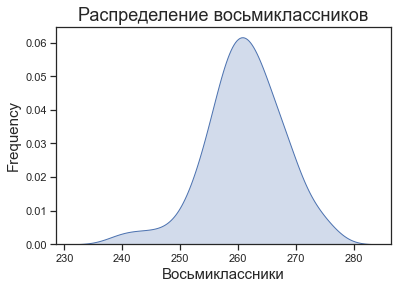

In [26]:
g = sns.kdeplot(data=datas, x="G08_AM_A_MATHEMATICS", shade=True)
g.set_xlabel("Восьмиклассники", size = 15)
g.set_ylabel("Frequency", size = 15)
plt.title('Распределение восьмиклассников', size = 18)

In [32]:
# Используем моду
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(datas[['G08_AM_A_MATHEMATICS']])
imp_num = SimpleImputer(strategy='most_frequent')
data_num_imp = imp_num.fit_transform(datas[['G08_AM_A_MATHEMATICS']])
datas['G08_AM_A_MATHEMATICS'] = data_num_imp
filled_data = data_num_imp[mask_missing_values_only]
print('G08_AM_A_MATHEMATICS', 'most_frequent', filled_data.size, filled_data[0], filled_data[filled_data.size-1], sep='; ')

G08_AM_A_MATHEMATICS; most_frequent; 1655; 260.0; 260.0


Также, так как категориального мы не нашли, обработаем ещё один численный. Пусть это будет признак - средние оценки по математике по восьмиклассникам, определенным как жители острова Гавайи или других островов Тихого океана.

In [34]:
# Так как процент пропусков у этого признкак целых 99%, то просто удалим его
datas.drop(['G08_HP_A_MATHEMATICS'], axis=1, inplace=True)

In [38]:
# Просто проверим что замена на моду для предыдущего признака прошла успешно
datas['G08_AM_A_MATHEMATICS'].isnull().sum()

0

In [40]:
## Выводы
В данной работе для обработки пропусков данных мы воспользовались двумя стратегиями: 1) удаление признака, содержащего большое количество пропусков (99%); 2) импутация данных в признаке путем заполнения наиболее часто встречаемым значение

Из представленных выше признаков также стоит отбросить признаки с проуентами пропусков от 75%, а таковых очень много: удаление строк привело бы к серьезной потере размера датасета, а заполнение пропусков привело бы к возможному нарушению набора данных (неправильные данные). Так как из 266 признаков набора данных абсолютное большинство - это признаки с процентом пропусков больше 50 и выше, а сами признаки - это средние оценки каких либо групп учеников с очень высокой детализацией, то имеет смысл вообще удалить все ненужные признаки и оставить лишь те, которые нужны для модели, поскольку тогда размер набора уменьшится значительно.
Окончательное решение по выбору признаков, поступающих на вход модели, может приниматься после проведения корреляционного анализа. Также после после проведения кросс-валидации и подбора оптимальных параметров модели возможен пересмотр набора признаков: либо их удаление, либо их добавление в зависимости от результатов работы алгоритма машинного обучения